# 📧 Spam Email Detection using NLP
**Student name:** Vaishnavi Sanjay Daregave                
**Project Title:** Spam Email Detection  
**Algorithms:** Naive Bayes, Logistic Regression  
**Concepts Used:** NLP, TF-IDF  
**Dataset:** SMS Spam Collection Dataset  
**Outcome:** Spam or Ham Classification


## 1. Business Understanding

### Problem Statement
Spam messages are unwanted and often harmful messages sent in bulk.  
The goal of this project is to build a machine learning model that can
automatically classify SMS messages as **Spam** or **Ham (Not Spam)** using
Natural Language Processing techniques.


## 2. Data Understanding

The SMS Spam Collection dataset contains SMS messages labeled as:
- **Ham** – normal messages
- **Spam** – unwanted promotional/fraud messages


In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv('/kaggle/input/sms-spam-collection-dataset/spam.csv',
                 encoding='latin-1')

# Keep useful columns
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

df.head()


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Dataset Size and Data Types


In [2]:
df.shape, df.dtypes


((5572, 2),
 label      object
 message    object
 dtype: object)

### Summary Statistics


In [3]:
df.describe(include='all')


,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


## 3. Data Preparation

- Removed unnecessary columns
- Checked for missing values
- Converted target labels into numeric format

### Machine Learning Task
- **Type:** Classification  
- **Independent Variable:** Message  
- **Dependent Variable:** Label


In [4]:
df.isnull().sum()


label      0
message    0
dtype: int64

In [5]:
df['label'] = df['label'].map({'ham': 0, 'spam': 1})
df.head()


,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


### Train-Test Split


In [6]:
from sklearn.model_selection import train_test_split

X = df['message']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


## 4. Data Preprocessing

We convert text data into numerical form using **TF-IDF Vectorization**.


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


## 5. Exploratory Data Analysis (EDA)


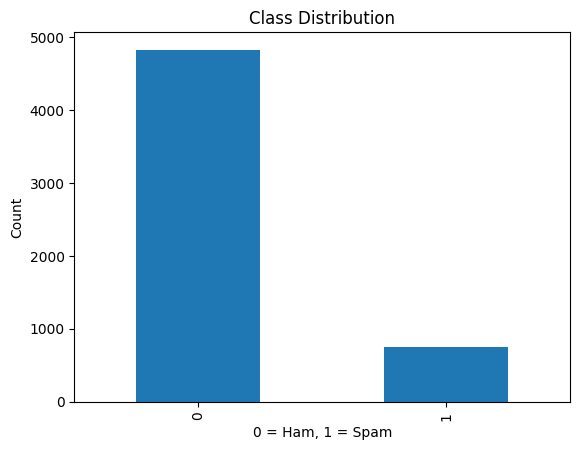

In [8]:
import matplotlib.pyplot as plt

df['label'].value_counts().plot(kind='bar')
plt.xlabel('0 = Ham, 1 = Spam')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()


### Message Length Analysis


In [9]:
df['length'] = df['message'].apply(len)
df.groupby('label')['length'].mean()


label
0     71.023627
1    138.866131
Name: length, dtype: float64

## 6. Model Selection

We use two classification algorithms:
1. Naive Bayes
2. Logistic Regression


In [10]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)

y_pred_nb = nb.predict(X_test_tfidf)

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.9668161434977578
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



In [11]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_tfidf, y_train)

y_pred_lr = lr.predict(X_test_tfidf)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.9524663677130045
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       965
           1       0.97      0.67      0.79       150

    accuracy                           0.95      1115
   macro avg       0.96      0.83      0.88      1115
weighted avg       0.95      0.95      0.95      1115



## 7. Prediction

Predict whether a new message is Spam or Ham.


In [12]:
def predict_spam(message):
    message_tfidf = tfidf.transform([message])
    result = lr.predict(message_tfidf)
    return "Spam" if result[0] == 1 else "Ham"

predict_spam("Congratulations! You have won a free prize")


'Spam'

## Conclusion

- Successfully built a Spam Detection system using NLP
- TF-IDF effectively transformed text data
- Logistic Regression showed slightly better performance than Naive Bayes

✅ Final Outcome: Accurate classification of Spam and Ham messages
